In [1]:
#import libraries
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
#open King County House Data with pandas

kc_housing = pd.read_csv('kc_house_data.csv')

#data size: 21597 rows x 21 columns

In [3]:
#drop Nan values

kc_housing = kc_housing.dropna()

# data size: 15762 rows x 21 columns

In [4]:
#drop columns id and date because we want to focus on how the features of the house affect sale price 

kc_housing = kc_housing.drop(columns = ['id', 'date'])

#data size: 15762 rows x 19 columns

In [5]:
#check data type

kc_housing.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#convert sqft_basement to float 
kc_housing['sqft_basement'] = kc_housing[kc_housing.sqft_basement != "?"]  
kc_housing['sqft_basement'] = kc_housing[kc_housing.sqft_basement != "NaN"]
kc_housing['sqft_basement'] = kc_housing['sqft_basement'].astype(float)            

In [7]:
#check data type

kc_housing.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

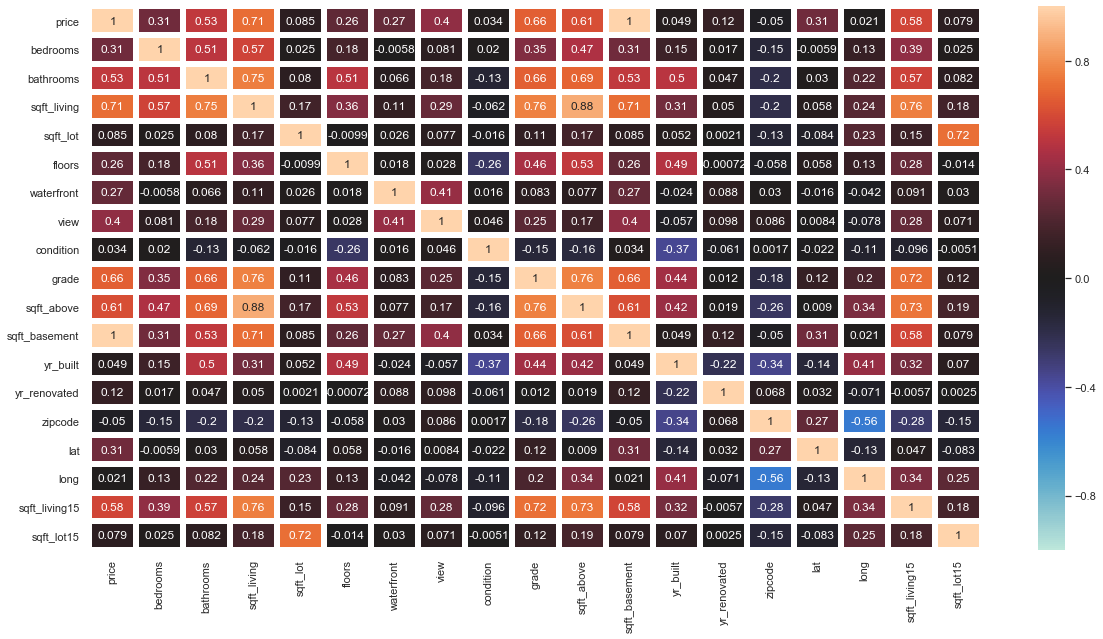

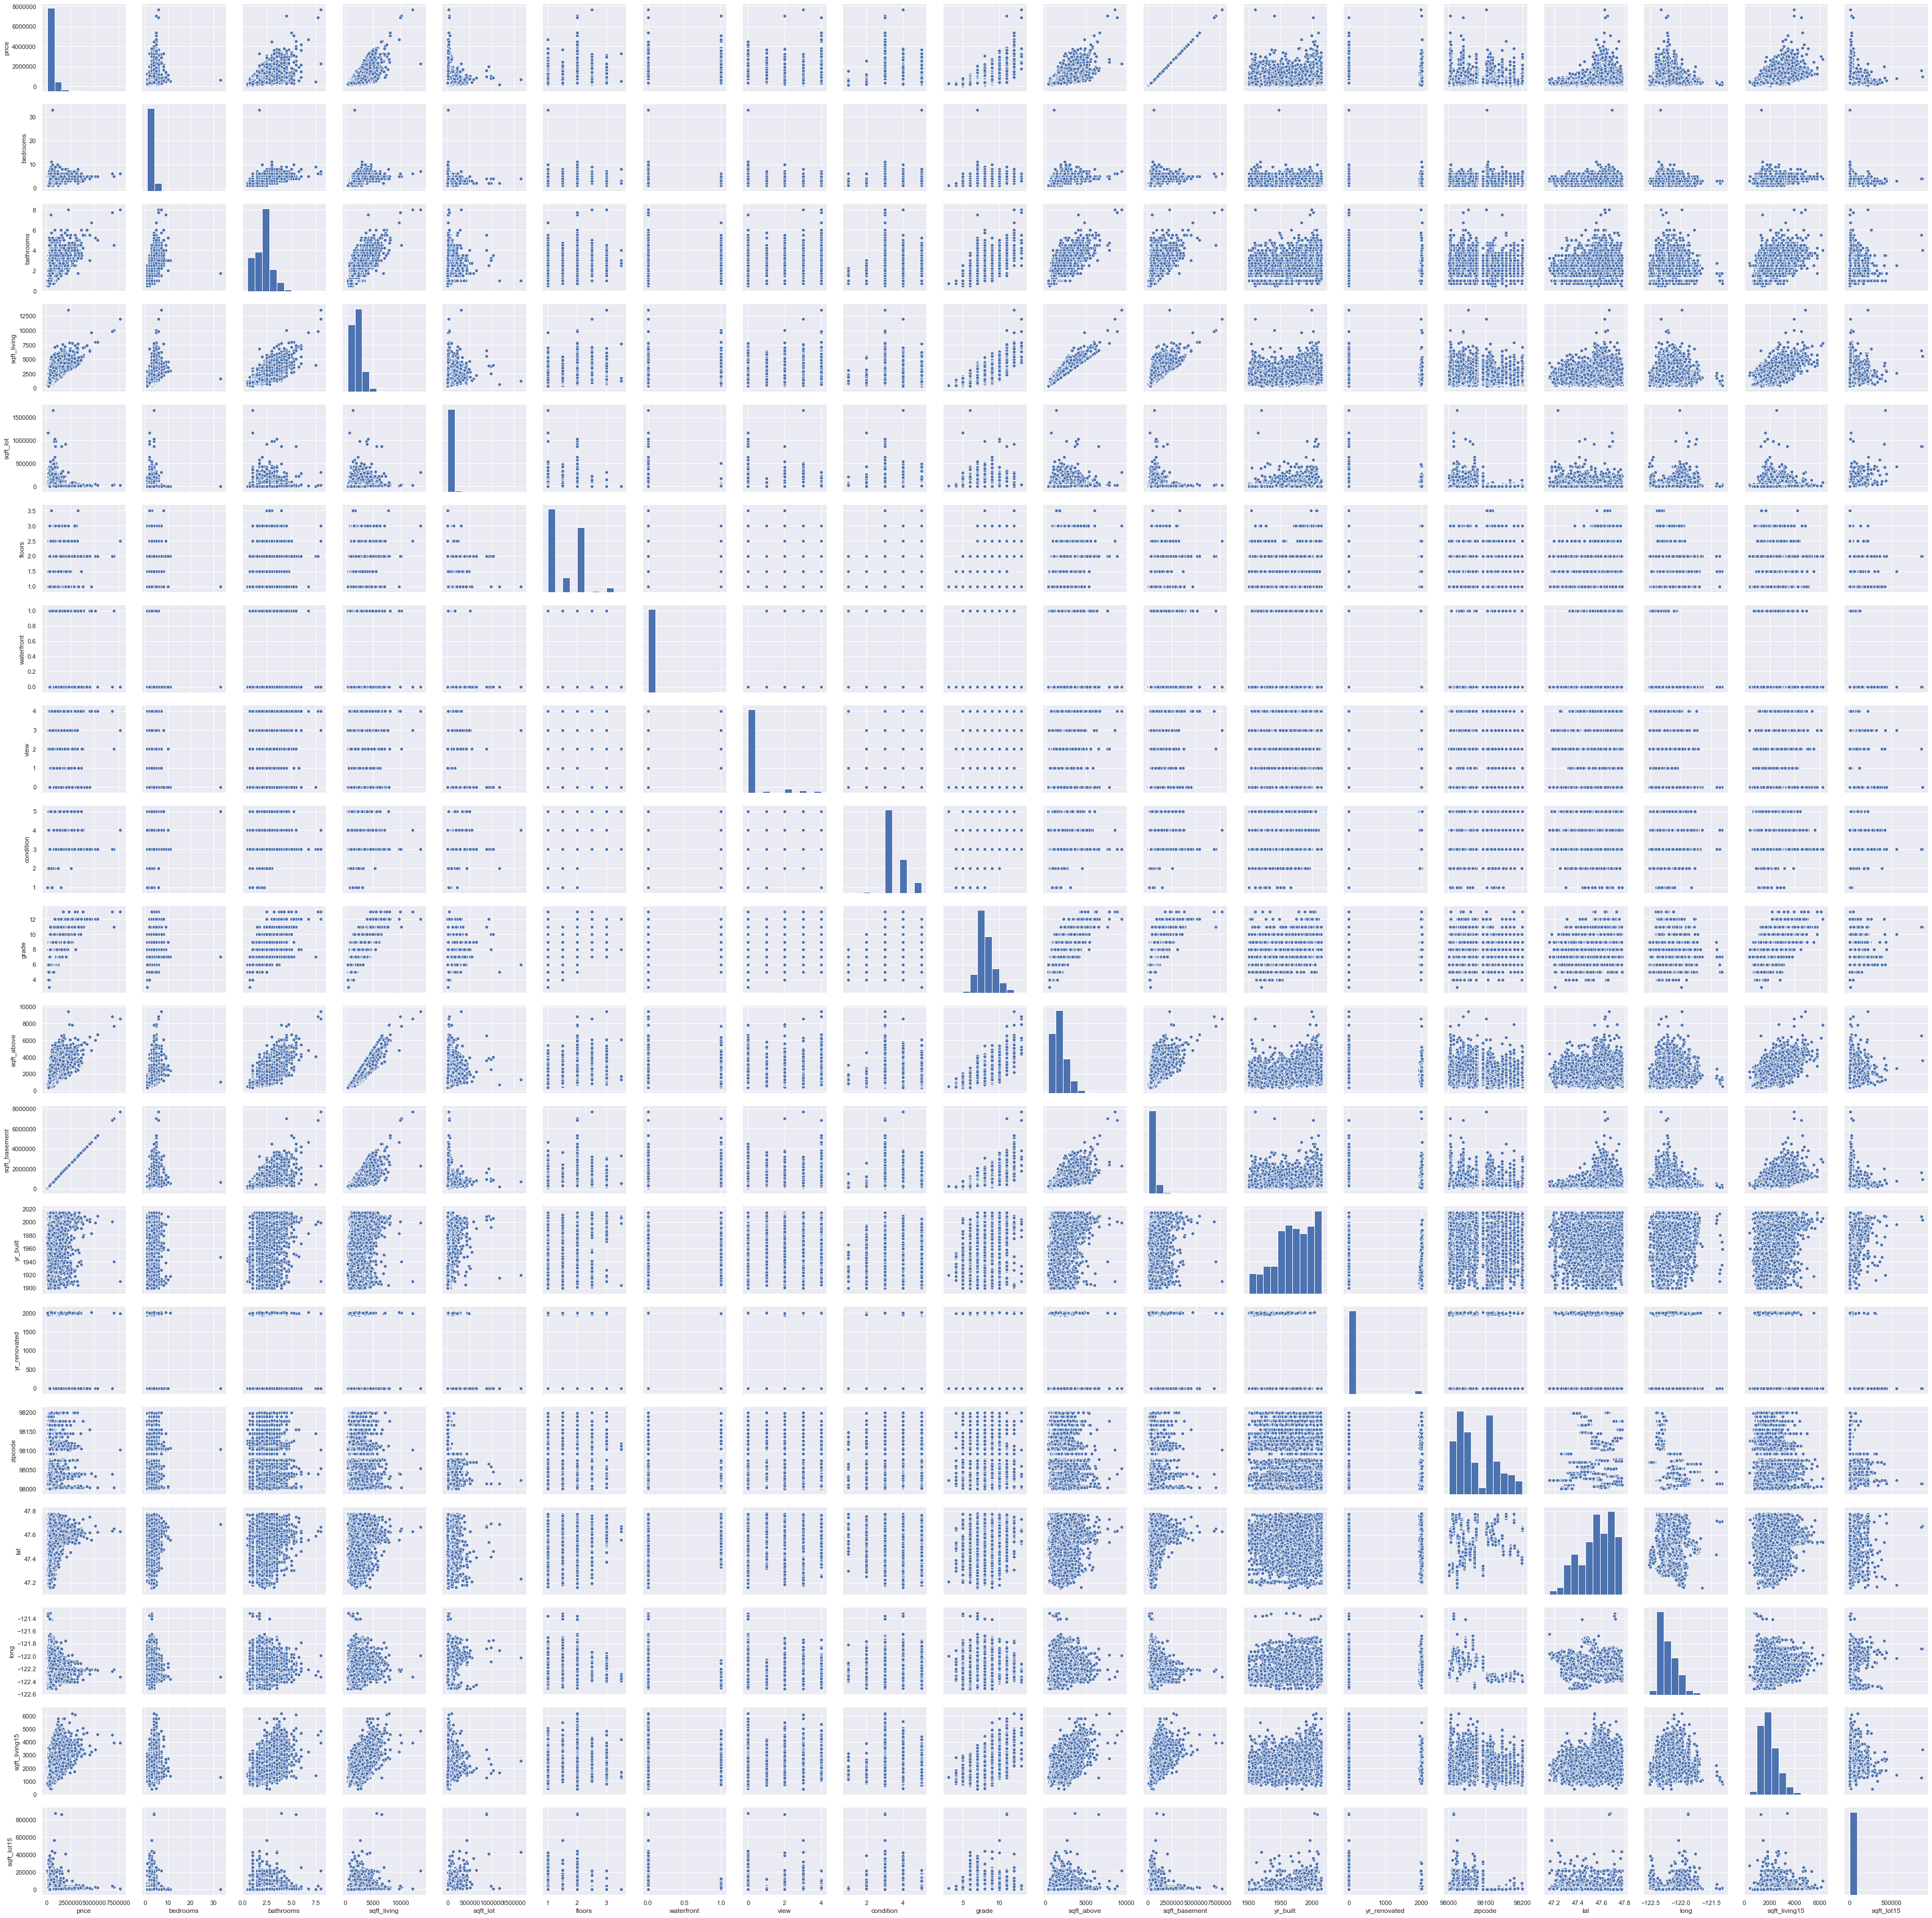

In [8]:
kc_housing_corr = kc_housing.corr()
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.heatmap(kc_housing_corr, center=0, vmin=-1, vmax=1, linewidth = 5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.pairplot(kc_housing)
plt.show()

In [9]:
#Correlation
corr = kc_housing.corr()
print(corr['price'].sort_values(ascending=False))

price            1.000000
sqft_basement    1.000000
sqft_living      0.706189
grade            0.664146
sqft_above       0.612014
sqft_living15    0.581572
bathrooms        0.526155
view             0.396862
lat              0.306607
bedrooms         0.305489
waterfront       0.274212
floors           0.259505
yr_renovated     0.122731
sqft_lot         0.084504
sqft_lot15       0.079402
yr_built         0.049345
condition        0.034367
long             0.021215
zipcode         -0.049502
Name: price, dtype: float64


count      15762.000000
mean      541317.175739
std       372225.838727
min        82000.000000
25%       321000.000000
50%       450000.000000
75%       644875.000000
max      7700000.000000
Name: price, dtype: object


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sale Price')]

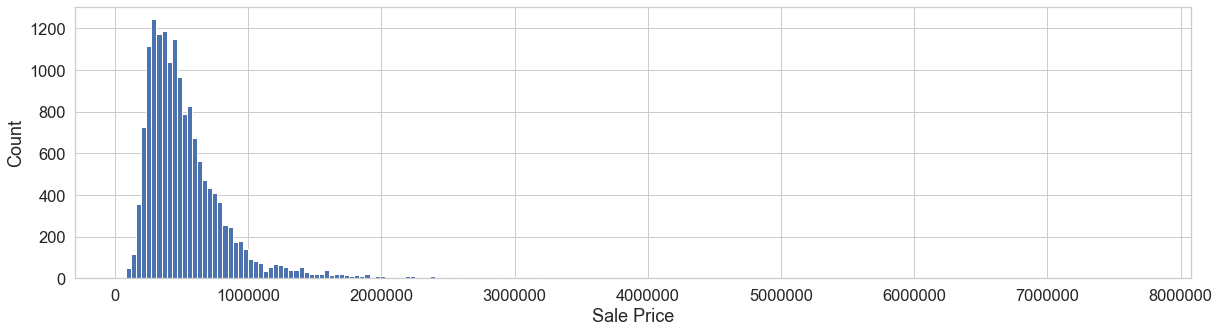

In [10]:
#review the distribution of sale price 
print(kc_housing["price"].describe().apply(lambda x: format(x, 'f')))
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [20, 5]})
sns.distplot(
    kc_housing['price'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count')

#distribution is skewed to the right 

(array([  16.,   26.,   54.,  146.,  395.,  838., 1544., 1939., 2013.,
        2184., 2118., 1586., 1241.,  668.,  353.,  267.,  153.,   88.,
          67.,   33.,   20.,    5.,    5.,    0.,    3.]),
 array([11.31447453, 11.49616478, 11.67785504, 11.85954529, 12.04123554,
        12.2229258 , 12.40461605, 12.58630631, 12.76799656, 12.94968682,
        13.13137707, 13.31306732, 13.49475758, 13.67644783, 13.85813809,
        14.03982834, 14.2215186 , 14.40320885, 14.58489911, 14.76658936,
        14.94827961, 15.12996987, 15.31166012, 15.49335038, 15.67504063,
        15.85673089]),
 <a list of 25 Patch objects>)

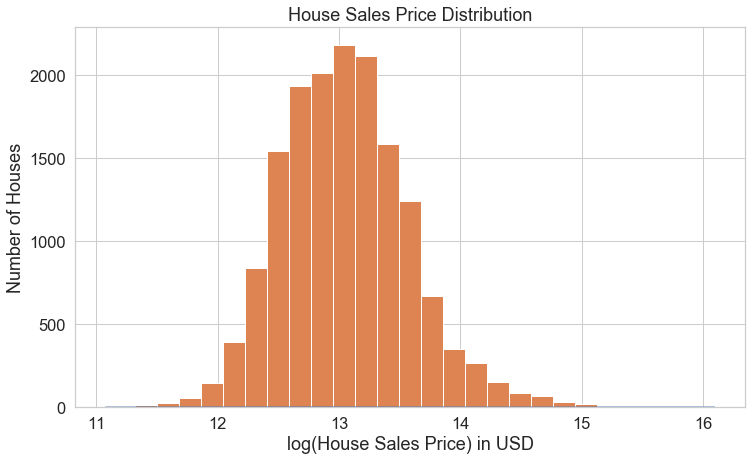

In [11]:
# normalize sale price data by taking the log of the price

plt.figure(figsize=(12,7))
sns.distplot(np.log(kc_housing.price), bins = 25)
plt.xlabel("log(House Sales Price) in USD")
plt.ylabel("Number of Houses")
plt.title("House Sales Price Distribution")
plt.hist(np.log(kc_housing.price), bins = 25)

In [12]:
#convert price column to log(price)
kc_housing['price'] = np.log(kc_housing.price)

In [13]:
print(kc_housing["price"].describe().apply(lambda x: format(x, 'f')))

count    15762.000000
mean        13.049552
std          0.526265
min         11.314475
25%         12.679196
50%         13.017003
75%         13.376812
max         15.856731
Name: price, dtype: object


In [14]:
kc_housing.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.341634   0.551221     0.698297  0.095583  0.314746   
bedrooms       0.341634  1.000000   0.512243     0.573575  0.025460  0.180485   
bathrooms      0.551221  0.512243   1.000000     0.753846  0.080362  0.505187   
sqft_living    0.698297  0.573575   0.753846     1.000000  0.165336  0.359407   
sqft_lot       0.095583  0.025460   0.080362     0.165336  1.000000 -0.009924   
floors         0.314746  0.180485   0.505187     0.359407 -0.009924  1.000000   
waterfront     0.178335 -0.005833   0.065688     0.111491  0.025982  0.018382   
view           0.347364  0.080577   0.180923     0.285506  0.077073  0.027518   
condition      0.034761  0.020074  -0.130287    -0.062319 -0.016036 -0.261013   
grade          0.703114  0.354243   0.664748     0.764251  0.108950  0.459843   
sqft_above     0.607198  0.474272   0.685677     0.876176  0.174216  0.529101   
sqft_basement  0.888107  0.305489   0.526155     0.706189  0.084504  0.259505   
yr_built       0.077629  0.153229   0.504841     0.314220  0.051578  0.487052   
yr_renovated   0.112335  0.017430   0.046988     0.050232  0.002147 -0.000720   
zipcode       -0.034844 -0.147255  -0.199625    -0.196537 -0.129494 -0.058130   
lat            0.452642 -0.005917   0.029930     0.058394 -0.084304  0.058190   
long           0.053112  0.129370   0.222755     0.239521  0.231638  0.129769   
sqft_living15  0.618808  0.390720   0.569290     0.756676  0.145393  0.281982   
sqft_lot15     0.089665  0.025217   0.081984     0.176820  0.718489 -0.013571   

               waterfront      view  condition     grade  sqft_above  \
price            0.178335  0.347364   0.034761  0.703114    0.607198   
bedrooms        -0.005833  0.080577   0.020074  0.354243    0.474272   
bathrooms        0.065688  0.180923  -0.130287  0.664748    0.685677   
sqft_living      0.111491  0.285506  -0.062319  0.764251    0.876176   
sqft_lot         0.025982  0.077073  -0.016036  0.108950    0.174216   
floors           0.018382  0.027518  -0.261013  0.459843    0.529101   
waterfront       1.000000  0.409773   0.016454  0.083034    0.077165   
view             0.409773  1.000000   0.046354  0.248679    0.170726   
condition        0.016454  0.046354   1.000000 -0.147810   -0.157958   
grade            0.083034  0.248679  -0.147810  1.000000    0.758289   
sqft_above       0.077165  0.170726  -0.157958  0.758289    1.000000   
sqft_basement    0.274212  0.396862   0.034367  0.664146    0.612014   
yr_built        -0.024068 -0.056645  -0.366938  0.443286    0.418850   
yr_renovated     0.087800  0.098386  -0.060845  0.011795    0.018888   
zipcode          0.030391  0.086479   0.001685 -0.184120   -0.257359   
lat             -0.015935  0.008403  -0.022250  0.117425    0.009045   
long            -0.042324 -0.078500  -0.105823  0.200680    0.342034   
sqft_living15    0.090588  0.277778  -0.096336  0.717031    0.732636   
sqft_lot15       0.029636  0.071496  -0.005139  0.116671    0.185505   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.888107  0.077629      0.112335 -0.034844  0.452642   
bedrooms            0.305489  0.153229      0.017430 -0.147255 -0.005917   
bathrooms           0.526155  0.504841      0.046988 -0.199625  0.029930   
sqft_living         0.706189  0.314220      0.050232 -0.196537  0.058394   
sqft_lot            0.084504  0.051578      0.002147 -0.129494 -0.084304   
floors              0.259505  0.487052     -0.000720 -0.058130  0.058190   
waterfront          0.274212 -0.024068      0.087800  0.030391 -0.015935   
view                0.396862 -0.056645      0.098386  0.086479  0.008403   
condition           0.034367 -0.366938     -0.060845  0.001685 -0.022250   
grade               0.664146  0.443286      0.011795 -0.184120  0.117425   
sqft_above          0.612014  0.418850      0.018888 -0.257359  0.009045   
sqft_basement       1.000000  0.049345      

In [15]:
# # Define variables:
# X = kc_housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view','condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].values
# y = kc_housing['price'].values

# # Add constants for the intercept term:
# Xconst = sm.add_constant(X)

# model = sm.OLS(y, Xconst, hasconst= True)
# multiple_model_fitted = model.fit()


# multiple_model_fitted.summary()


In [16]:
#"long' and 'sqft_lot15' are not statistically significant. Redefine X and drop 'long' and 'sqft_lot15'
X = kc_housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view','condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','zipcode', 'lat', 'sqft_living15']].values

In [17]:
#Re-run model summary
y = kc_housing['price'].values
Xconst = sm.add_constant(X)

model = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted = model.fit()


multiple_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     6819.
Date:                Mon, 23 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:02:31   Log-Likelihood:                 4072.0
No. Observations:               15762   AIC:                            -8110.
Df Residuals:                   15745   BIC:                            -7980.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.2935      3.176     -3.871      0.000     -18.518      -6.069
x1             0.0187      0.002      9.087      0.000       0.015       0.023
x2             0.0331      0.004      9.294      0.000       0.026       0.040
x3          2.307e-05   4.87e-06      4.736      0.000    1.35e-05    3.26e-05
x4          4.084e-07   3.69e-08     11.079      0.000    3.36e-07    4.81e-07
x5             0.0692      0.004     17.724      0.000       0.062       0.077
x6            -0.1264      0.019     -6.519      0.000      -0.164      -0.088
x7             0.0179      0.002      7.553      0.000       0.013       0.023
x8             0.0406      0.003     15.814      0.000       0.036       0.046
x9             0.0786      0.002     32.198      0.000       0.074       0.083
x10        -4.229e-05   4.65e-06     -9.090      0.000   -5.14e-05   -3.32e-05
x11          8.25e-07   7.27e-09    113.492      0.000    8.11e-07    8.39e-07
x12           -0.0011   7.96e-05    -14.259      0.000      -0.001      -0.001
x13         2.303e-05   4.01e-06      5.743      0.000    1.52e-05    3.09e-05
x14           -0.0002   3.27e-05     -5.361      0.000      -0.000      -0.000
x15            0.9081      0.012     73.193      0.000       0.884       0.932
x16         8.523e-05   3.72e-06     22.925      0.000    7.79e-05    9.25e-05
==============================================================================
Omnibus:                    10947.806   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           806814.178
Skew:                          -2.636   Prob(JB):                         0.00
Kurtosis:                      37.651   Cond. No.                     1.41e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
kc_housing = kc_housing.drop(columns = 'long') 

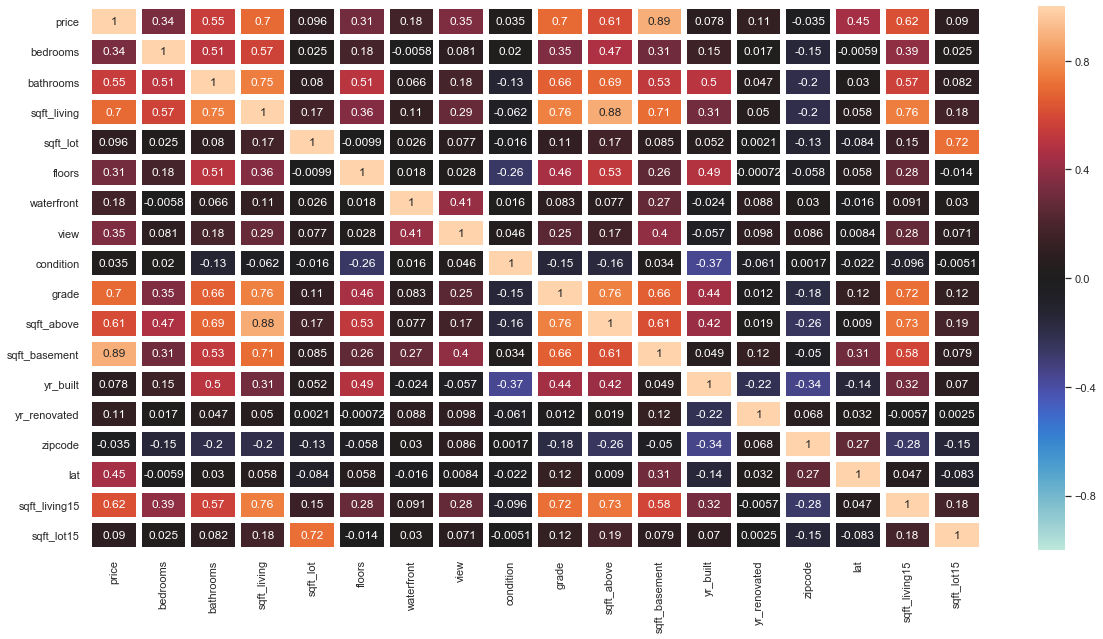

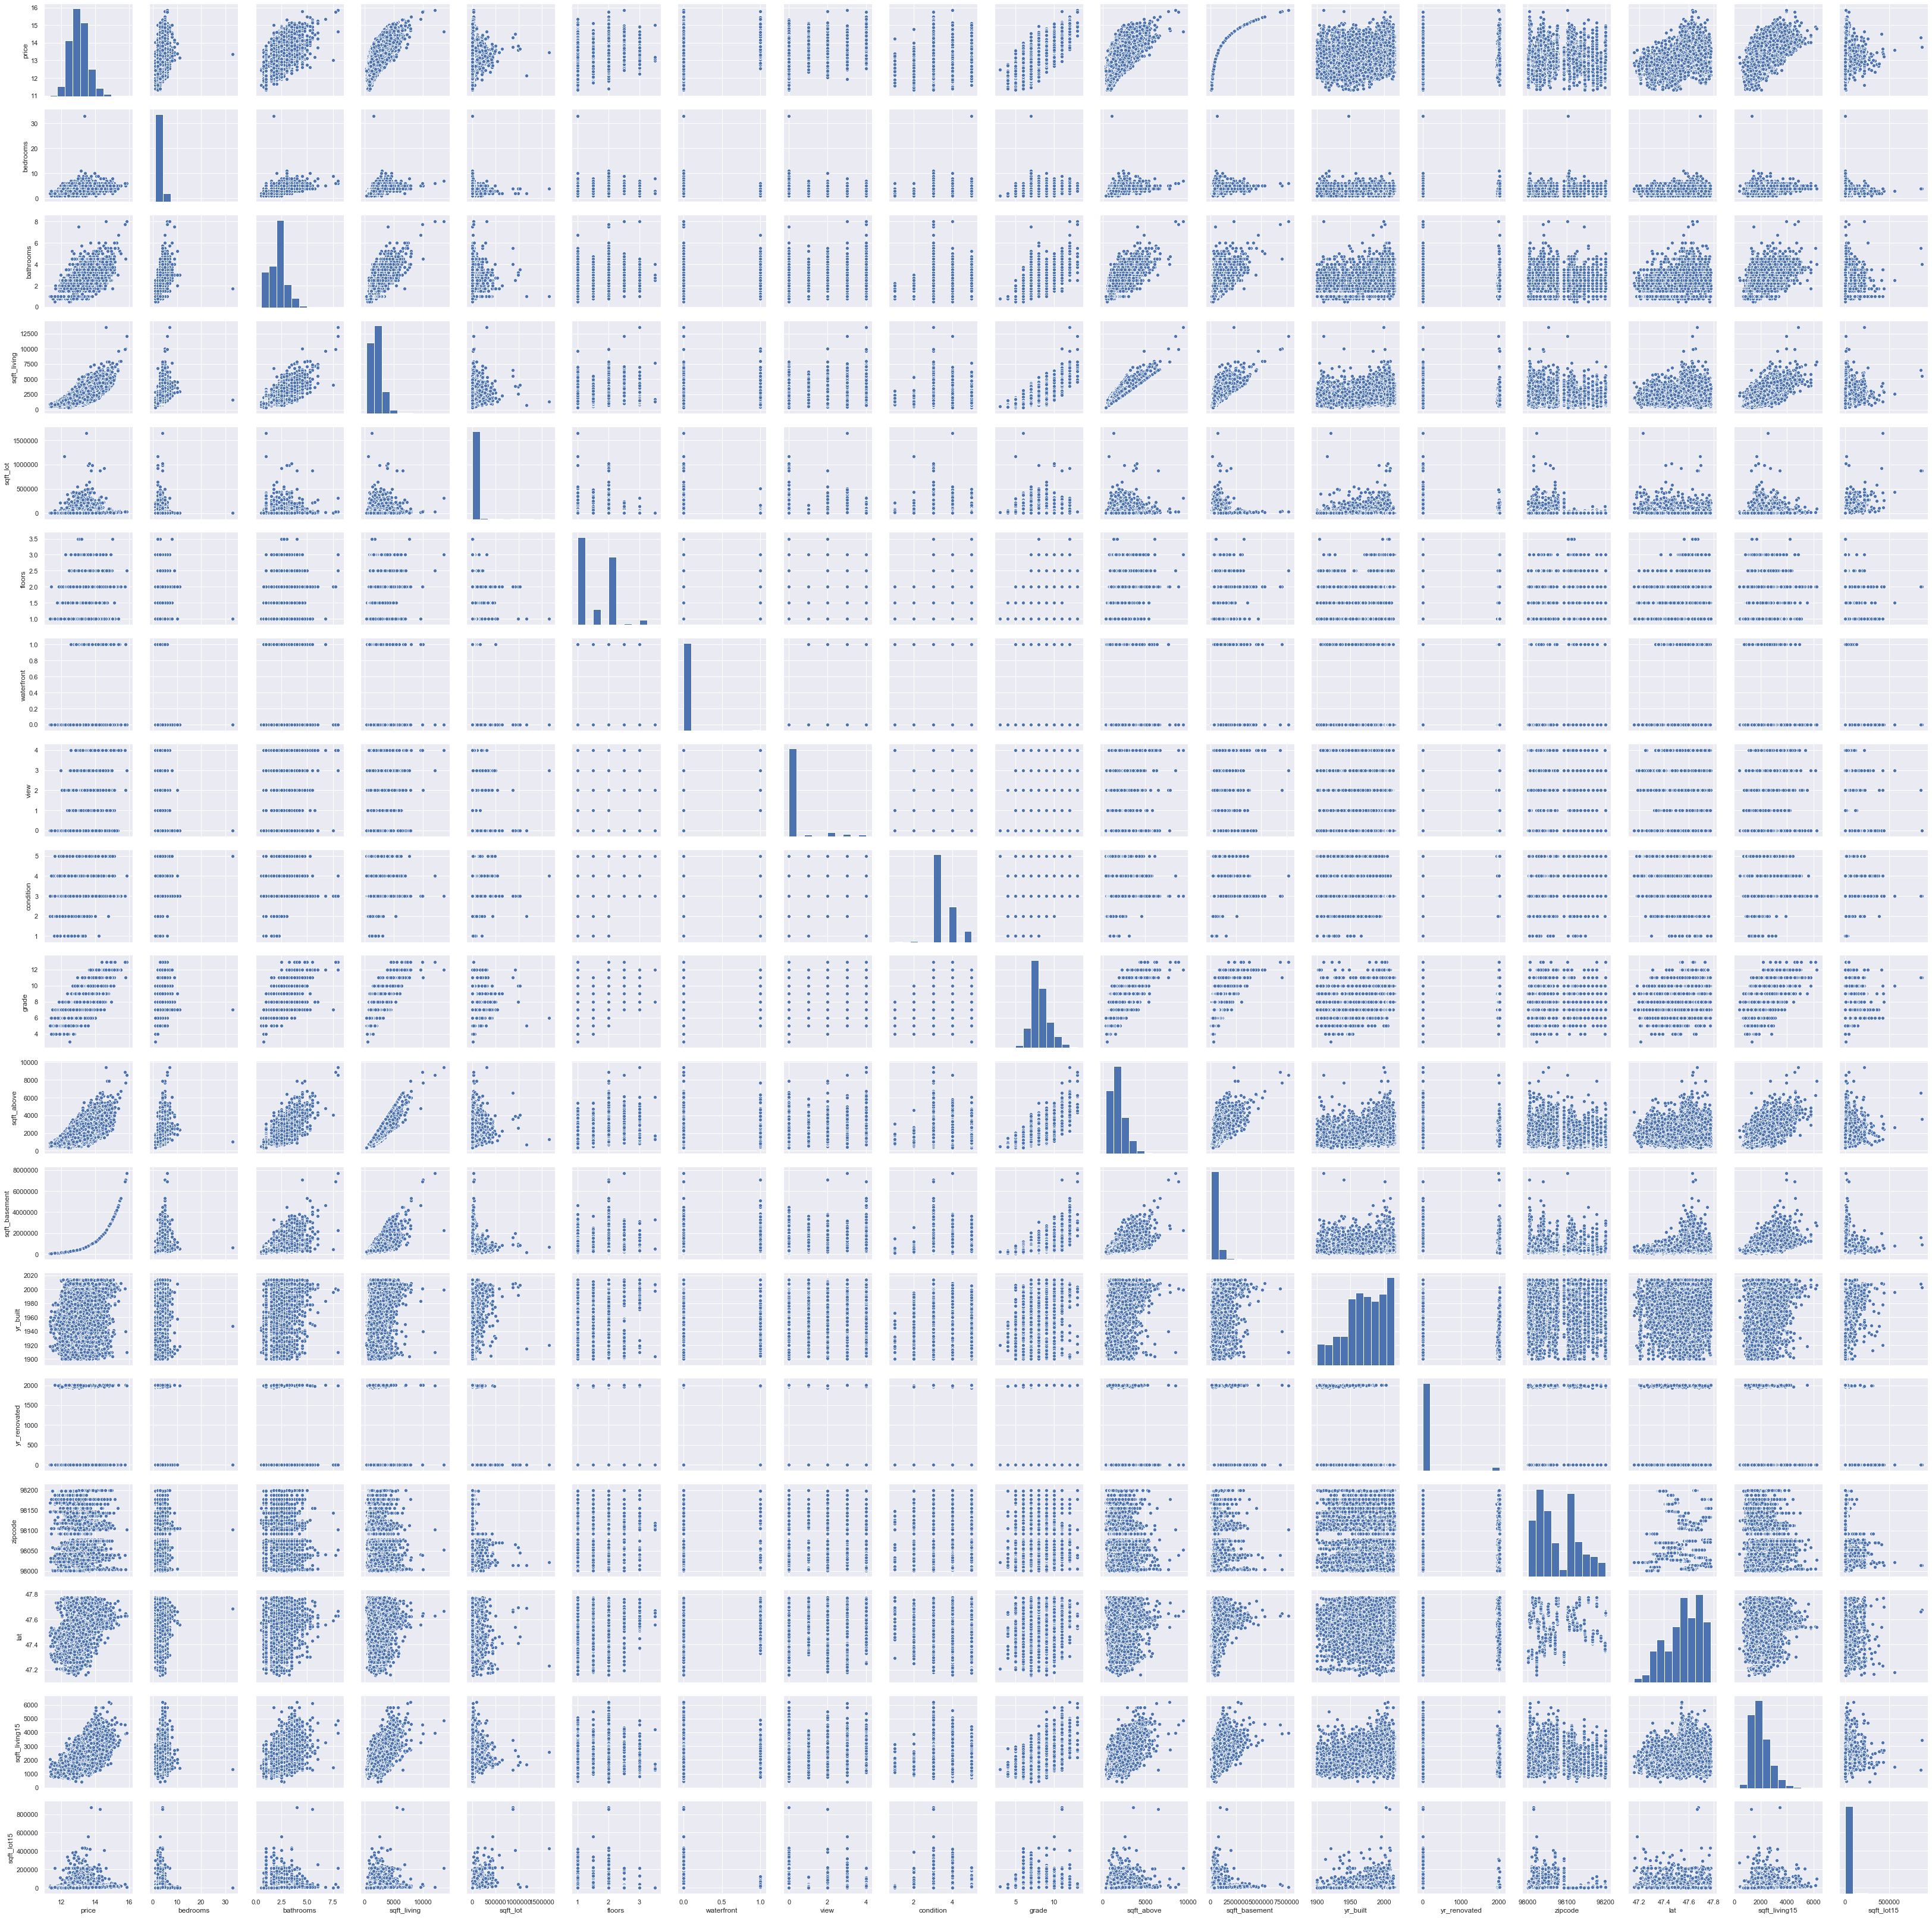

In [19]:
kc_housing_corr = kc_housing.corr()
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.heatmap(kc_housing_corr, center=0, vmin=-1, vmax=1, linewidth = 5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.pairplot(kc_housing)
plt.show()

In [20]:
#Correlation
corr = kc_housing.corr()
print(corr['price'].sort_values(ascending=False))

price            1.000000
sqft_basement    0.888107
grade            0.703114
sqft_living      0.698297
sqft_living15    0.618808
sqft_above       0.607198
bathrooms        0.551221
lat              0.452642
view             0.347364
bedrooms         0.341634
floors           0.314746
waterfront       0.178335
yr_renovated     0.112335
sqft_lot         0.095583
sqft_lot15       0.089665
yr_built         0.077629
condition        0.034761
zipcode         -0.034844
Name: price, dtype: float64
